## Linear Programming

### 1: The "What" and "Why"

#### 1.1 Overview: What is Optimization?

In engineering, science, and business, we are constantly trying to find the "best" way to do something.

- What's the strongest bridge we can build for a given cost?

- What's the fastest route for a delivery truck?

- What's the most product we can make in our factory given our limited resources?

"Optimization" is the formal, mathematical process of finding this "best" solution from all possible solutions.

#### 1.2 Introduction: What is Linear Programming?

Linear Programming (LP) is one of the most powerful and widely used optimization techniques. It's a method to find the best (e.g., maximum or minimum) outcome in a mathematical model where all the relationships are linear.

LP has three key components:

1) Decision Variables ($x_1, x_2, ...$):
- These are the "knobs" we can turn, the quantities we control.
- Example: How many chairs should we build? How many hours should we run machine A?

2) Objective Function (Z):

- This is the single value we want to maximize or minimize.
- It must be a linear function of the decision variables.
- Example: maximize profit, where profit = $25 \times (\text{chairs}) + 40 \times (\text{tables})$

3) Constraints:

- These are the rules, limitations, and boundaries of the real world.
- They must also be linear inequalities or equalities.
- Example: $\text{Wood Used} = 2 \times (\text{chairs}) + 5 \times (\text{tables}) \le 100 $

#### 1.3 Simple Example: The "Bakery Problem"

Let's make this concrete. Imagine you run a small bakery that makes two products:

- Cakes ($x_c$)
- Cookies ($x_k$)

| Resource      | Required for 1 Cake | Required for 1 Batch of Cookies | Total Available |
|---------------|--------------------|----------------------------------|-----------------|
| Flour (g)     | 200                | 100                              | 10,000          |
| Sugar (g)     | 50                 | 75                               | 4,500           |
| Profit        | $20                | $12                              |                 |

Goal: How many cakes ($x_c$) and batches of cookies ($x_k$) should you make to maximize your profit?

#### 1.4 Formulate the LP Problem

Decision Variables:

- $x_c$ = number of cakes to make

- $x_k$ = number of cookie batches to make

Objective Function (Maximize Profit):

- $Z = 20x_c + 12x_k$

Constraints:

- Flour: $200x_c + 100x_k \le 10000$

- Sugar: $50x_c + 75x_k \le 4500$

- Non-negativity: $x_c \ge 0$ and $x_k \ge 0$ (We can't make negative cakes!)

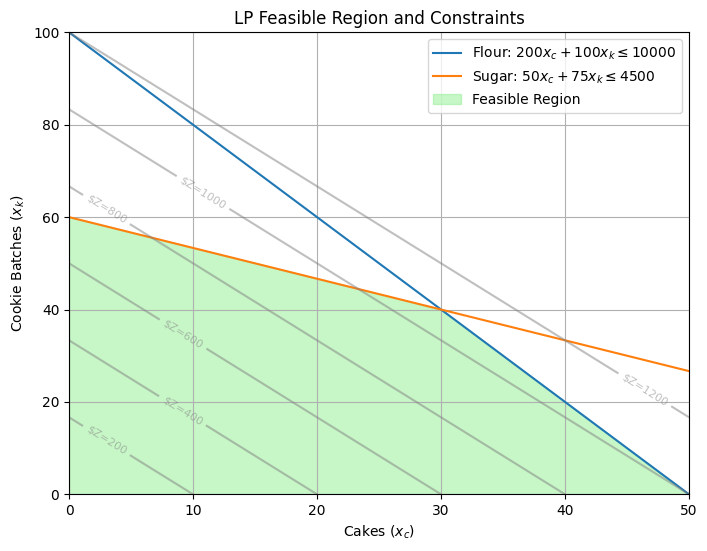

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Decision variable ranges
x_c = np.linspace(0, 50, 200)
x_k = np.linspace(0, 100, 200)

# Constraint lines
flour_constraint = (10000 - 200 * x_c) / 100
sugar_constraint = (4500 - 50 * x_c) / 75

plt.figure(figsize=(8,6))

# Plot constraints
plt.plot(x_c, flour_constraint, label=r'Flour: $200x_c + 100x_k \leq 10000$')
plt.plot(x_c, sugar_constraint, label=r'Sugar: $50x_c + 75x_k \leq 4500$')

# Fill feasible region
x_c_feasible = []
x_k_feasible = []
for xc in x_c:
    fk = (10000 - 200 * xc) / 100
    sk = (4500 - 50 * xc) / 75
    k_max = min(fk, sk)
    if k_max >= 0:
        x_c_feasible.append(xc)
        x_k_feasible.append(k_max)
plt.fill_between(x_c_feasible, 0, x_k_feasible, color='lightgreen', alpha=0.5, label='Feasible Region')

# Add contour lines for profit
# Create contour lines for the objective function (profit)
x_c_mesh, x_k_mesh = np.meshgrid(x_c, x_k)
Z = 20*x_c_mesh + 12*x_k_mesh
levels = [200, 400, 600, 800, 1000, 1200]
CS = plt.contour(x_c_mesh, x_k_mesh, Z, levels=levels, colors='gray', alpha=0.5)
plt.clabel(CS, inline=True, fontsize=8, fmt='$Z=%1.0f')

plt.xlim(0, max(x_c))
plt.ylim(0, max(x_k))
plt.xlabel('Cakes ($x_c$)')
plt.ylabel('Cookie Batches ($x_k$)')
plt.title('LP Feasible Region and Constraints')
plt.legend()
plt.grid(True)
plt.show()

The Graphical Solution (for 2D problems)

When we only have two variables, we can actually see the solution.

1. Treat the constraints as lines:

 - $200x_c + 100x_k = 10000 \implies 2x_c + x_k = 100$

 - $50x_c + 75x_k = 4500 \implies 2x_c + 3x_k = 180$

2. Plot these lines on a graph (with $x_c$ on the x-axis, $x_k$ on the y-axis).

3. The area that satisfies all constraints (including $x_c \ge 0, x_k \ge 0$) is called the "Feasible Region".

4. Fundamental Theorem of LP: The optimal solution (max profit) will always be at one of the corner points (vertices) of this feasible region.

Our feasible region has four corners:

- (0, 0) $\implies Z = 20(0) + 12(0) = 0$

- (50, 0) [x-intercept of Flour line] $\implies Z = 20(50) + 12(0) = 1000$

- (0, 60) [y-intercept of Sugar line] $\implies Z = 20(0) + 12(60) = 720$

- (30, 40) [Intersection of Flour and Sugar lines] $\implies Z = 20(30) + 12(40) = 600 + 480 = 1080$

Conclusion: The maximum profit is 1080, which we get by making 30 cakes and 40 batches of cookies.

In [ ]:
#Example on how to use sympy to calculate the intersection points equations:
from sympy import symbols, Eq, solve
xc, xk = symbols('xc xk')
sol = solve([Eq(200*xc + 100*xk, 10000), Eq(50*xc + 75*xk, 4500)], (xc, xk))
print(f'Intersection Point: Cakes = {sol[xc]}, Cookie Batches = {sol[xk]}')

Intersection Point: Cakes = 30, Cookie Batches = 40


### 2: Numerical Methods

2.1 The Problem with Pictures

The graphical method is fantastic for intuition... but what happens if we add a third product, like "Bread"?

- We'd have 3 variables ($x_c, x_k, x_b$).
- Our feasible region is now a 3D shape (a polyhedron).
- The optimal solution is still at a corner... but it's hard to visualize and solve.

What if we have 1000 products and 500 resource constraints? We can't visualize 1000 dimensions!

We need a numerical method that can:

1. Handle any number of variables and constraints.
2. Be automated by a computer.
3. Find the optimal corner point without having to check all of them (there could be billions!).

2.2 The Numerical Method: The Simplex Algorithm

The most famous numerical method for LP is the Simplex Algorithm, developed by George Dantzig.

The Core Idea: The Simplex algorithm is a "clever walker."

1. It starts at one corner of the feasible region (usually the origin, (0,0)).
2. It looks at the "edges" connected to its current corner. (In the first iteration of our example, we are choosing between increasing $x_c$ or increasing $x_k$).
3. It asks: "Which edge leads to a corner with a better objective value?" (each unit of $x_c$ increase the objective by 20, while each unit of $x_k$ increase the objective by 12. So, $x_c$ is chosen.)
4. It "walks" along that edge to the new, better corner. (To the point (50,0))
5. It repeats steps 2-4 until it reaches a corner where all connected edges lead to worse solutions. (In the second iteration, we walk to the point (30,40))
6. This final corner is the optimal solution.

This is brilliant because it finds the optimum without visiting every single corner.

In [32]:
from scipy.optimize import linprog

c = [-20, -12]  # minimize, so negate coefficients
A = [[200,100],[50,75]]
b = [10000,4500]
x_c_bounds = (0, None)
x_k_bounds = (0, None)
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_c_bounds, x_k_bounds])

print(f"Cakes to make (x_c): {result.x[0]:.0f}")
print(f"Cookie batches to make (x_k): {result.x[1]:.0f}")
print(f"Maximum Profit: ${-result.fun:.2f}")


Cakes to make (x_c): 30
Cookie batches to make (x_k): 40
Maximum Profit: $1080.00


### 4: Real World Problems

🏭 Problem 1: Diet Optimization

A student needs daily intake of at least: 60g protein, 80g carbs. 
Two foods available:

| Food | Protein | Carbs | Cost |
| ---- | ------- | ----- | ---- |
| A    | 10      | 20    | 3    |
| B    | 20      | 10    | 4    |

Formulate an LP to minimize cost while meeting nutrition constraints.

🚛 Problem 2: Transportation Problem

A company must ship goods from 2 warehouses to 3 cities, minimizing transport cost.
Formulate it as LP (you’ll end up with 6 variables and 5 constraints).

🧰 Problem 3: Staff Scheduling

A store must be staffed 8 hours per day; each worker can work 4 consecutive hours.
Minimize total workers while ensuring each time block is covered.


### 5: Conclusion

What we learned:

- Linear Programming is a powerful tool for optimization (max/min) when all relationships are linear.

- Problems are defined by decision variables, an objective function, and constraints.

- For 2 variables, we can solve by graphing and checking corner points.

- For N variables, we need a numerical method like the Simplex Algorithm.

- This algorithm "walks" the corners of the N-dimensional feasible region.

- To use numerical solvers, we convert our problem into Standard Form (using slack variables) and then into Matrix Form (c, A, b).

- Python libraries like scipy.optimize.linprog (fast, numerical) and PuLP (readable, model-based) can solve these problems for us.

Where to go next?

- Integer Programming (IP): What if $x_c$ must be a whole number? (You can't sell 0.5 cakes).

- Non-Linear Programming (NLP): What if the profit isn't linear? (e.g., the more you sell, the lower the price).

- Sensitivity Analysis: How much does the profit change if we get 10 more grams of flour?